In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

import sklearn 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from scipy.stats import chi2_contingency, chi2
print("sklearn version:", sklearn.__version__)


sklearn version: 1.8.0


I. Exploratory Data Analysis (EDA)

1.1. Kiểm tra dữ liệu gốc 

In [3]:
df = pd.read_csv('data.csv')
df.head()[['Make', 'Year', 'MSRP', 'Engine Fuel Type', 'Engine HP', 'city mpg' ]]

Make  Year   MSRP             Engine Fuel Type  Engine HP  city mpg
0  BMW  2011  46135  premium unleaded (required)      335.0        19
1  BMW  2011  40650  premium unleaded (required)      300.0        19
2  BMW  2011  36350  premium unleaded (required)      300.0        20
3  BMW  2011  29450  premium unleaded (required)      230.0        18
4  BMW  2011  34500  premium unleaded (required)      230.0        18

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

- Bộ dữ liệu gồm 11914 quan sát và 16 biến.
- Quan sát thấy không có "missing value" - giá trị thiếu
- Kiểu dữ liệu của các biến trong bảng: 5 biến định tính (object), 5 biến định lượng (numerical)
### Bảng: Mô tả các biến trong bộ dữ liệu ô tô
| STT | Tên biến | Ý nghĩa |
|-----|---------|---------|
| 1 | Make | Hãng sản xuất xe (ví dụ: Toyota, BMW, Ford). |
| 2 | Model | Dòng xe cụ thể thuộc hãng (ví dụ: Camry, Civic). |
| 3 | Year | Năm sản xuất hoặc năm ra mắt phiên bản xe. |
| 4 | Engine Fuel Type | Loại nhiên liệu sử dụng cho động cơ (xăng, diesel, hybrid, điện…). |
| 5 | Engine HP | Công suất động cơ, tính bằng mã lực (horsepower). |
| 6 | Engine Cylinders | Số xi-lanh của động cơ. |
| 7 | Transmission Type | Loại hộp số của xe (tự động, số sàn, CVT…). |
| 8 | Driven_Wheels | Kiểu dẫn động của xe (FWD, RWD, AWD, 4WD). |
| 9 | Number of Doors | Số cửa của xe (2 cửa, 4 cửa…). |
| 10 | Market Category | Phân khúc hoặc định vị thị trường của xe (Luxury, Performance, Economy…). |
| 11 | Vehicle Size | Kích thước xe (Compact, Midsize, Large). |
| 12 | Vehicle Style | Kiểu dáng xe (Sedan, SUV, Coupe, Hatchback…). |
| 13 | highway MPG | Mức tiêu thụ nhiên liệu trên đường cao tốc (miles per gallon). |
| 14 | city mpg | Mức tiêu thụ nhiên liệu trong đô thị (miles per gallon). |
| 15 | Popularity | Chỉ số phản ánh mức độ phổ biến của xe trên thị trường. |
| 16 | MSRP | Giá niêm yết đề xuất của nhà sản xuất (USD). |


In [5]:
df.describe().T

count          mean           std     min      25%  \
Year              11914.0   2010.384338      7.579740  1990.0   2007.0   
Engine HP         11845.0    249.386070    109.191870    55.0    170.0   
Engine Cylinders  11884.0      5.628829      1.780559     0.0      4.0   
Number of Doors   11908.0      3.436093      0.881315     2.0      2.0   
highway MPG       11914.0     26.637485      8.863001    12.0     22.0   
city mpg          11914.0     19.733255      8.987798     7.0     16.0   
Popularity        11914.0   1554.911197   1441.855347     2.0    549.0   
MSRP              11914.0  40594.737032  60109.103604  2000.0  21000.0   

                      50%       75%        max  
Year               2015.0   2016.00     2017.0  
Engine HP           227.0    300.00     1001.0  
Engine Cylinders      6.0      6.00       16.0  
Number of Doors       4.0      4.00        4.0  
highway MPG          26.0     30.00      354.0  
city mpg             18.0     22.00      137.0  
Popularity         1385.0   2009.00     5657.0  
MSRP              29995.0  42231.25  2065902.0

1.2. See Target Distribution and Normalize if Needed (Xem phân phối của biến phụ thuộc và Chuẩn hóa nếu cần) - Biến: MSRP

Kiểm tra phân phối của biến MSRP nhằm đánh giá mức độ lệch. Do giá xe thường có phân phối lệch phải, điều này có thể ảnh hưởng tiêu cực đến hiệu quả của các mô hình hồi quy tuyến tính. Vì vậy, khi phát hiện mức độ lệch lớn, chúng tôi áp dụng phép biến đổi log cho biến mục tiêu để làm cho phân phối trở nên phù hợp hơn với mô hình hồi quy.

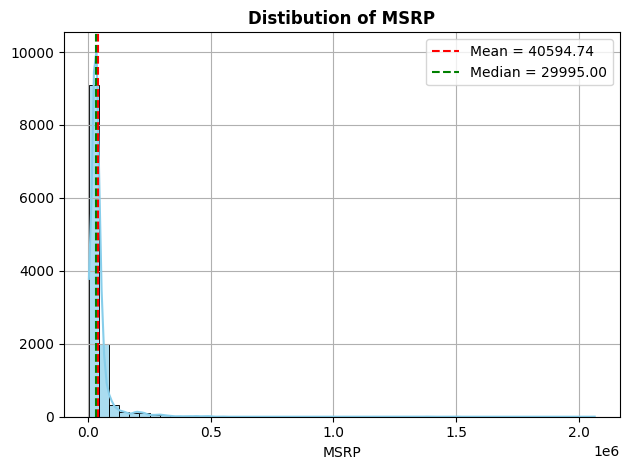

In [6]:
iqr = df['MSRP'].quantile(0.75) - df['MSRP'].quantile(0.25)
bin_width = 2 * iqr / (len(df['MSRP']) ** (1/3))
bins = int((df['MSRP'].max() - df['MSRP'].min()) / bin_width)

sns.histplot(df['MSRP'], kde=True, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(df['MSRP'].mean(), color='red', linestyle='--', label=f'Mean = {df['MSRP'].mean():.2f}')
plt.axvline(df['MSRP'].median(), color='green', linestyle='--', label=f'Median = {df['MSRP'].median():.2f}')
plt.title(f'Distibution of MSRP', fontsize=12, fontweight='bold')
plt.legend()
plt.xlabel(df['MSRP'].name)
plt.ylabel('')
plt.grid()

plt.tight_layout()
    #plt.savefig('quantitative_variable_distributions.png', dpi=400, bbox_inches='tight') 
plt.show()

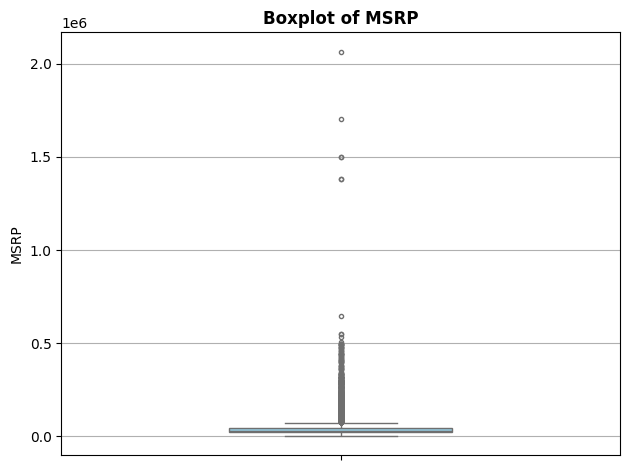

In [7]:
sns.boxplot(
        y=df['MSRP'],
        color='skyblue',
        width=0.4,
        fliersize=3   # kích thước điểm outlier
    )
plt.title(f'Boxplot of MSRP', fontsize=12, fontweight='bold')
plt.ylabel(df['MSRP'].name)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

MSRP: Phân phối lệch phải với một số giá trị ngoại lai rất cao. Những giá trị này có thể đại diện cho các mẫu xe sang trọng hoặc hiệu suất cao.
Chính vì vậy, để tránh mô hình hồi quy tuyến tính bị kéo lệch, ta lấy log(MSRP).

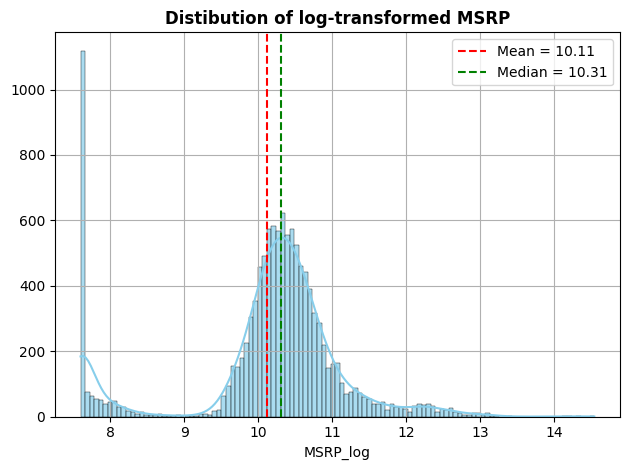

In [8]:
df['MSRP_log'] = np.log1p(df['MSRP'])

iqr = df['MSRP_log'].quantile(0.75) - df['MSRP_log'].quantile(0.25)
bin_width = 2 * iqr / (len(df['MSRP_log']) ** (1/3))
bins = int((df['MSRP_log'].max() - df['MSRP_log'].min()) / bin_width)


sns.histplot(df['MSRP_log'], kde=True, bins=bins, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(df['MSRP_log'].mean(), color='red', linestyle='--', label=f'Mean = {df["MSRP_log"].mean():.2f}')
plt.axvline(df['MSRP_log'].median(), color='green', linestyle='--', label=f'Median = {df["MSRP_log"].median():.2f}')
plt.title(f'Distibution of log-transformed MSRP', fontsize=12, fontweight='bold')
plt.legend()
plt.xlabel(df['MSRP_log'].name)
plt.ylabel('')
plt.grid()
plt.tight_layout()
plt.show()

1.3. Look for Trends and Polynomial Shapes

Khảo sát mối quan hệ giữa từng biến định lượng và biến mục tiêu (biến phụ thuộc) msrp_log. Bằng cách khớp các đường hồi quy tuyến tính và hồi quy đa thức (bậc 2 và bậc 3), chúng tôi có thể đánh giá trực quan xem mô hình tuyến tính đơn giản có đủ phù hợp hay không, hay liệu tồn tại các mối quan hệ bậc cao hơn. Việc này giúp định hướng quá trình xây dựng đặc trưng (feature engineering) và lựa chọn mô hình. Qua đó, chúng tôi xác định các xu hướng phi tuyến tiềm ẩn mà hồi quy tuyến tính thông thường có thể không nắm bắt được.

In [9]:
df_nums = df.select_dtypes(include = 'number')
df_nums.head()

Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  city mpg  \
0  2011      335.0               6.0              2.0           26        19   
1  2011      300.0               6.0              2.0           28        19   
2  2011      300.0               6.0              2.0           28        20   
3  2011      230.0               6.0              2.0           28        18   
4  2011      230.0               6.0              2.0           28        18   

   Popularity   MSRP   MSRP_log  
0        3916  46135  10.739349  
1        3916  40650  10.612779  
2        3916  36350  10.500977  
3        3916  29450  10.290483  
4        3916  34500  10.448744

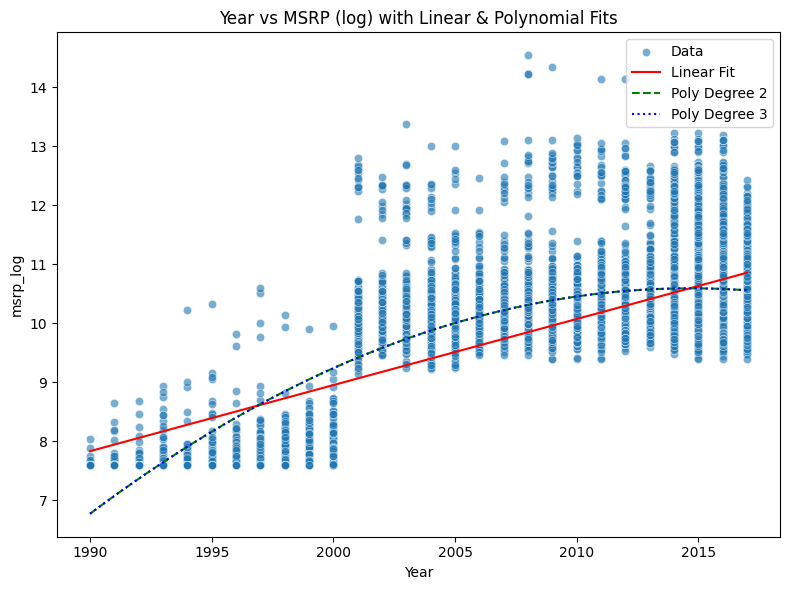

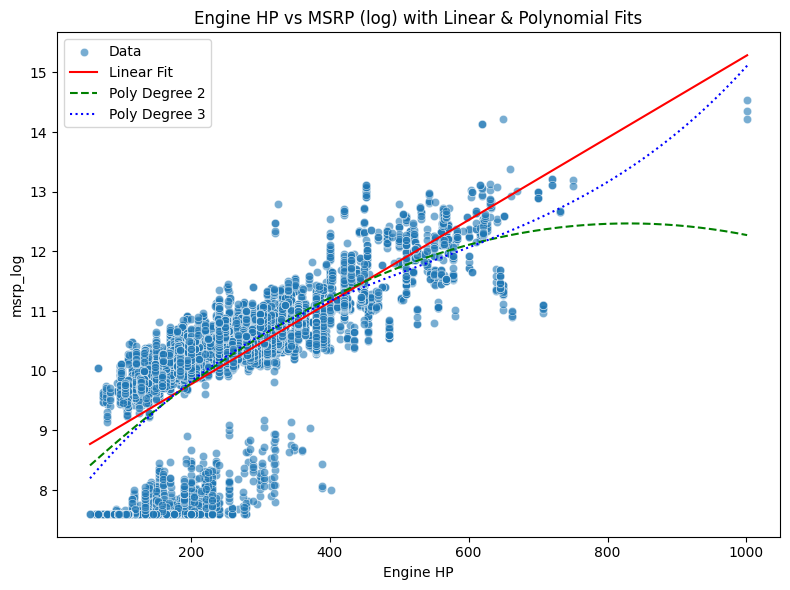

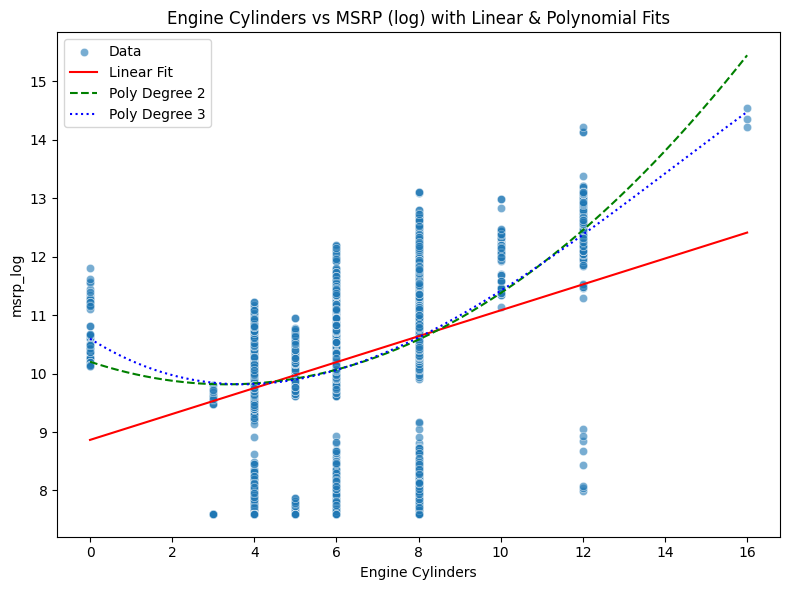

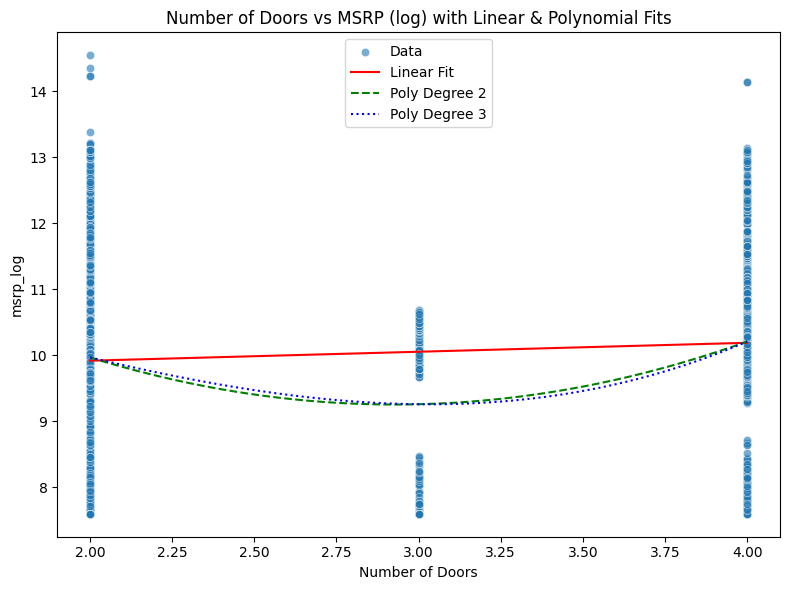

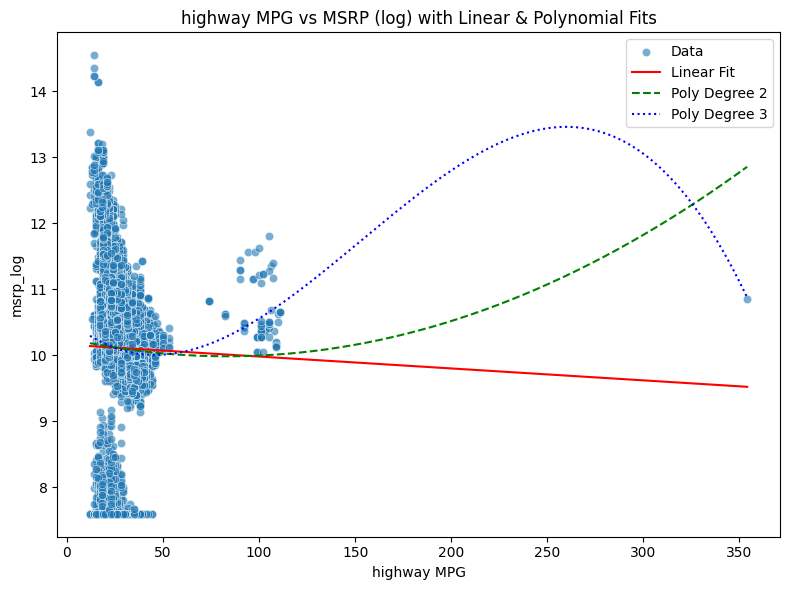

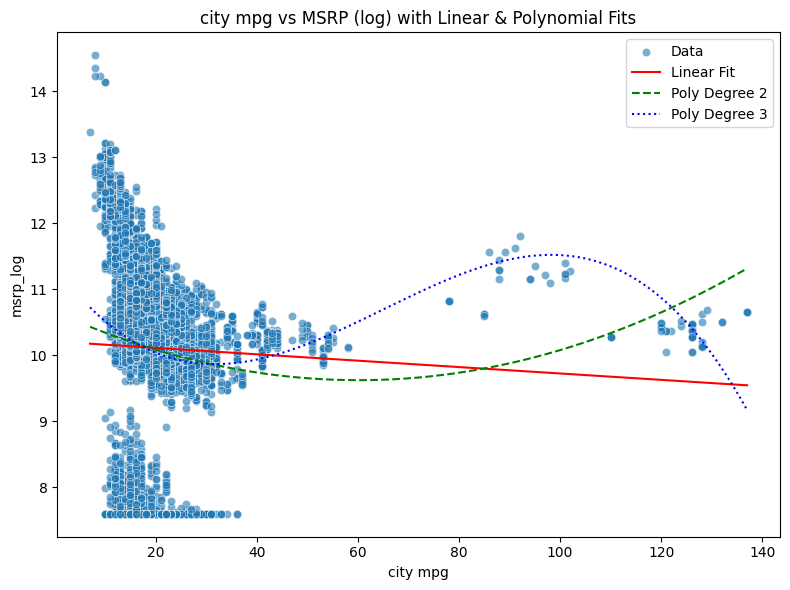

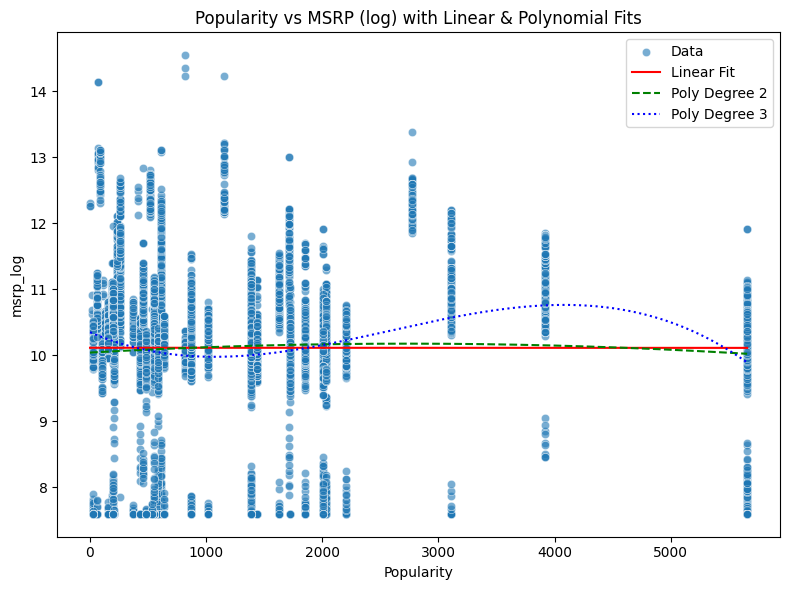

In [10]:
for column in df_nums.columns[:-2]:
    df_select = df[['MSRP_log', column]].dropna()
    X = df_select[[column]].values
    y = df_select['MSRP_log'].values

    x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

    # Fit and predict using a simple linear regression model
    lin_reg = LinearRegression().fit(X, y)
    y_lin_pred = lin_reg.predict(x_range)

    # Fit and predict using degree-2 polynomial regression
    poly2 = PolynomialFeatures(degree=2)
    X_poly2 = poly2.fit_transform(X)
    lin_reg2 = LinearRegression().fit(X_poly2, y)
    y_poly2_pred = lin_reg2.predict(poly2.transform(x_range))

    # Fit and predict using degree-3 polynomial regression
    poly3 = PolynomialFeatures(degree=3)
    X_poly3 = poly3.fit_transform(X)
    lin_reg3 = LinearRegression().fit(X_poly3, y)
    y_poly3_pred = lin_reg3.predict(poly3.transform(x_range))
    # Plot the scatter plot and overlay linear and polynomial regression curves
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X.flatten(), y=y, label="Data", alpha=0.6)
    plt.plot(x_range, y_lin_pred, color="red", label="Linear Fit")
    plt.plot(x_range, y_poly2_pred, color="green", linestyle='--', label="Poly Degree 2")
    plt.plot(x_range, y_poly3_pred, color="blue", linestyle=':', label="Poly Degree 3")

    # Add labels, title, and legends
    plt.xlabel(column)
    plt.ylabel("msrp_log")
    plt.title(f"{column} vs MSRP (log) with Linear & Polynomial Fits")
    plt.legend()
    plt.tight_layout()
    plt.show()

1.4. See Correlation Between Numerical Columns

Tạo ma trận tương quan của tất cả các biến số, bao gồm cả biến mục tiêu đã được biến đổi log là msrp_log. Việc này giúp nhận diện hiện tượng đa cộng tuyến giữa các biến độc lập (thể hiện qua các hệ số tương quan có giá trị tiệm cận 1 hoặc -1), đồng thời cho phép xác định những biến có mối quan hệ mạnh với biến mục tiêu. 
Khi các biến độc lập có mức độ tương quan cao, có thể áp dụng các kỹ thuật như giảm chiều dữ liệu hoặc regularization để giảm sự dư thừa thông tin và cải thiện hiệu quả của mô hình.

In [11]:
correation_matrix = df_nums.corr()
fig1 = px.imshow(correation_matrix, text_auto=True, color_continuous_scale='RdBu_r', title='Correlation Heatmap', width=800, height=800)
fig1.update_traces(textfont_size=9.5)
fig1.show()

MSRP/ (MSRP_log) có mối tương quan chặt chẽ với Year và Engine HP.

=> Tuổi đời và hiệu suất cũng là những yếu tố quyết định giá cả quan trọng.

Công suất động cơ (Engine HP) và số xi-lanh (Engine Cylinders) có mối quan hệ tích cực mạnh mẽ. Càng nhiều xi-lanh thì công suất càng lớn.

Công suất động cơ (Engine HP) và số xi-lanh (Engine Cylinders) có mối quan hệ tiêu cực với mức tiêu hao nhiên liệu trong thành phố (city MPG) và trên đường cao tốc (highway MPG). Động cơ lớn hơn tiêu thụ nhiều nhiên liệu hơn.

1.5. Analyze MSRP Across Vehicle Specs (Phân tích giá dựa vào thông số xe)

Xem xét MSRP_log thay đổi như thế nào dựa trên các thông số kỹ thuật chính của xe như Make, Model, Engine Fuel Type, ....Bằng cách hình dung mức giá khác nhau giữa các tính năng khác nhau, ta có thể khám phá các mẫu có ý nghĩa, phát hiện các giá trị ngoại lệ và đánh giá tính năng nào có thể ảnh hưởng đến giá ô tô

In [12]:
# Price distribution per vehicle style
fig5 = px.box(df, x="Vehicle Style", y="MSRP_log", title="Log MSRP Distribution by Vehicle Style")
fig5.show()

In [13]:
# How price varies across the top 20 brands
top_makes = df["Make"].value_counts().nlargest(20).index
fig6 = px.box(df[df["Make"].isin(top_makes)], x="Make", y="MSRP_log", title="Log MSRP by Top 20 Makes")
fig6.show()

In [14]:
# See if smaller cars are more fuel efficient and how that reflects in pricing
fig7 = px.scatter(df, x='city mpg', y='MSRP_log', color='Vehicle Size', title='City MPG vs Log MSRP (by Vehicle Size)')
fig7.show()

In [15]:
# See how EVs cluster
fig8 = px.scatter(df[df["highway MPG"] <  150], x='highway MPG', y='MSRP_log', color='Engine Fuel Type', title='Highway MPG vs Log MSRP (by Fuel Type)')
fig8.show()

In [16]:
fig9 = px.scatter(df, x='Engine HP', y='MSRP_log', color='Engine Cylinders', title='Engine HP vs MSRP (by Cylinder Count)')
fig9.show()

1.6. See Missing Counts and Percentages Per Column

In [17]:
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ["column", "missing_count"]
missing_data['missing_pct'] = (missing_data["missing_count"] / len(df)) * 100
missing_data

fig10 = px.bar(missing_data, x="column", y="missing_pct", title="Percentage of Missing Values per Column",
             labels={"missing_pct": "Percent Missing", "column": "Column"},
             text="missing_pct")
fig10.update_traces(texttemplate="%{text:.1f}%", textposition="outside")
fig10.update_layout(yaxis_range=[0, 100])
fig10.show()

In [18]:
df["market_category_missing"] = df["Market Category"].isnull()


fig11 = px.box(df, x="market_category_missing", y="MSRP", title="MSRP Distribution by Market Category Missingnes", 
               labels={"market_category_missing": "Market Category Missing", "MSRP": "MSRP"})
fig11.update_xaxes(tickvals=[False, True], ticktext=["Not Missing", "Missing"])
fig11.show()

2. Data Processing and Feature Engineering

2.1 Handle Missing Values (thông qua hiểu biết thực tế, dữ liệu ngoài)

2.1.1 Handle Missing Values for Engine Fuel Type

In [19]:
df[df["Engine Fuel Type"].isnull()]

Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004              NaN      155.0               6.0   
11322  Suzuki  Verona  2004              NaN      155.0               6.0   
11323  Suzuki  Verona  2004              NaN      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  \
11321      Midsize         Sedan           25        17         481  17199   
11322      Midsize         Sedan           25        17         481  20199   
11323      Midsize         Sedan           25        17         481  18499   

       MSRP_log  market_category_missing  
11321  9.752665                     True  
11322  9.913438                     True  
11323  9.825526                     True

In [20]:
df.loc[df["Engine Fuel Type"].isna(), 'Engine Fuel Type'] = 'regular unleaded'

2.1.2 Handle Missing Values for Engine HP

<Axes: xlabel='MSRP_log', ylabel='Count'>

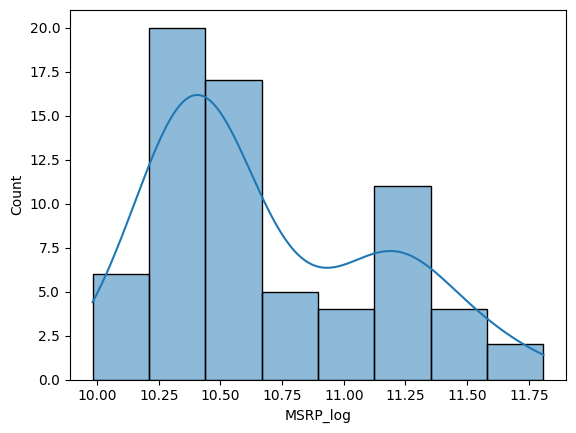

In [21]:
# SXem phân phối của MSRP log như nào khi có missing Engine HP
enhp_na = df[df["Engine HP"].isna()]
sns.histplot(data=enhp_na, x=enhp_na.MSRP_log, kde=True)

In [22]:
# Fill missing horsepower values with info from edmunds.com and MotorTrend (part 1)
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "500e"), "Engine HP"] = 111
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Continental") & (df["Make"] == "Lincoln") & (df["Engine Fuel Type"] == "premium unleaded (recommended)") & (df["Year"] == 2017), "Engine HP"] = 400
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Continental") & (df["Make"] == "Lincoln") & (df["Engine Fuel Type"] == "premium unleaded (recommended)") & (df["Year"] == 2017), "Engine HP"] = 335
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Escape") & (df["Make"] == "Ford") & (df["Driven_Wheels"] == "front wheel drive") & (df["Engine Fuel Type"] == "regular unleaded"), "Engine HP"] = 168
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Escape") & (df["Make"] == "Ford") & (df["Driven_Wheels"] == "all wheel drive") & (df["Engine Fuel Type"] == "regular unleaded"), "Engine HP"] = 178
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Fit EV") & (df["Make"] == "Honda"), "Engine HP"] = 123
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Focus") & (df["Make"] == "Ford") & (df["Engine Fuel Type"] == "electric"), "Engine HP"] = 143
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Freestar") & (df["Make"] == "Ford") & (df["Year"] == 2005), "Engine HP"] = 193
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "i-MiEV") & (df["Year"] == 2014), "Engine HP"] = 66
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Impala") & (df["Make"] == "Chevrolet") & (df["Engine Fuel Type"] == "flex-fuel (unleaded/natural gas)"), "Engine HP"] = 260
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "Leaf") & (df["Make"] == "Nissan"), "Engine HP"] = 107
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "M-Class") & (df["Make"] == "Mercedes-Benz") & (df["Year"] == 2015) & (df["Engine Fuel Type"] == "diesel"), "Engine HP"] = 254
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "MKZ") & (df["Make"] == "Lincoln") & (df["Year"] == 2017) & (df["Engine Fuel Type"] == "regular unleaded"), "Engine HP"] = 245
df.loc[(df["Engine HP"].isna()) & (df["Model"] == "RAV4 EV") & (df["Make"] == "Toyota") & (df["Year"].isin([2013, 2014])), "Engine HP"] = 154
df.loc[(df["Model"] == "Soul EV") & (df["Make"] == "Kia"), "Engine HP"] = 109


In [23]:
# Fill missing horsepower values using publicly available info (part 2)
updates = {
    6921: {'Engine HP': 362},
    6924: {'Engine HP': 422},
    6923: {'Engine HP': 691},
    6922: {'Engine HP': 380},
    6925: {'Engine HP': 380},
    6926: {'Engine HP': 328},
    6927: {'Engine HP': 417},
    6928: {'Engine HP': 762},
    6929: {'Engine HP': 373},
    6930: {'Engine HP': 328},
    6931: {'Engine HP': 315},
    6932: {'Engine HP': 463},
    6933: {'Engine HP': 315},
    6934: {'Engine HP': 328},
    6935: {'Engine HP': 328, 'Model': 2015},
    6936: {'Engine HP': 417, 'city mpg': 95, 'highway MPG': 106},
    6937: {'Engine HP': 463, 'city mpg': 89, 'highway MPG': 98},
    6938: {'Engine HP': 373}
}

# Áp dụng cập nhật
for idx, vals in updates.items():
    for col, val in vals.items():
        df.loc[idx, col] = val


2.1.3 Handle Missing Values for engine_cylinders

In [24]:
# See models with missing `engine_cylinder` values 
# Check xem chúng có là xe điện EV hay là động cơ quay ko
df[df["Engine Cylinders"].isna()].Model.value_counts()

Model
RX-8       17
e-Golf      4
RX-7        3
i-MiEV      3
Bolt EV     2
RAV4 EV     1
Name: count, dtype: int64

Lưu ý: ta có thể thấy rằng tất cả các mẫu xe bị thiếu giá trị eEngine Cylinders đều là EV ngoại trừ hai chiếc xe thể thao Mazda (RX-7 và RX-8) có động cơ quay. Vì tất cả các mô hình này không có xi lanh truyền thống, chúng ta sẽ điền các giá trị NaN bằng 0 (là danh mục cho 0 xi lanh).

In [25]:
df.loc[df["Engine Cylinders"].isna(), "Engine Cylinders"] = 0

2.1.4 Handle Missing Values for number_of_doors

<Axes: xlabel='MSRP_log', ylabel='Count'>

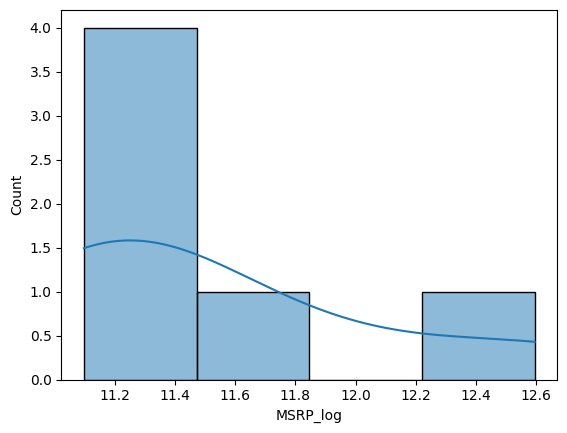

In [26]:
# See msrp_log distribution for samples with missing number_of_doors
ndoors_na = df[df["Number of Doors"].isna()]
sns.histplot(data=ndoors_na, x=ndoors_na.MSRP_log, kde=True)

Nhận thấy missing value của Number of Doors toàn rơi vào phân khúc giá xe cao (không nằm trong khoảng trung bình 9-11) nên phải cẩn thận xử lý

In [27]:
df.loc[4666, 'Number of Doors'] = 2
df.loc[(df["Number of Doors"].isna()) & (df["Model"] == "Model S") & (df["Year"] == 2016), 'Number of Doors'] = 4

Lưu ý: Biến duy nhất còn lại bị thiếu giá trị là market category. Do tính chất đa nhãn của nó, việc gán tính năng này không đơn giản như đề cập đến một nguồn trực tuyến. Thay vào đó, nó có thể liên quan đến suy luận theo hướng dữ liệu dựa trên vehicle_style và các tính năng khác.

Trước khi xử lý market category, chúng ta cần thêm dữ liệu về EV/Hybric để phù hợp với bài toán của mình đã (Bài toán của tôi là xem: Thị trg ô tô có đang chuyển sang xe điện 1 cách hợp lý không)

Mục tiêu là so sánh giá cũng như nắm bắt giá của thị trường ô tô hiện đại, nên ta sẽ tiến hành loại bỏ phần dữ liệu trc (Year = 2010)

Điều này cũng giúp cân bằng khi ta thêm dữ liệu EV/Hybric (vì cái này chỉ xuất hiện sau năm 2010)

In [28]:
df_2009 = df[(df['Year'] >= 2009) & (df['Market Category'].notna())].copy()
df_2009['powertrain'] = 'ICE'
# Gán cho Hybrid trước (vì có thể có xe Hybrid vẫn chạy xăng)
df_2009.loc[df_2009['Market Category'].str.contains('Hybrid', case=False, na=False), 'powertrain'] = 'Hybrid'

# Gán cho EV sau cùng để đảm bảo độ ưu tiên cao nhất cho xe điện thuần túy
df_2009.loc[df_2009['Engine Fuel Type'] == 'electric', 'powertrain'] = 'EV'

In [29]:
print(df_2009['powertrain'].value_counts())

powertrain
ICE       6172
Hybrid     336
EV          61
Name: count, dtype: int64


In [30]:
df_2009.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6569 entries, 0 to 11912
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6569 non-null   object 
 1   Model                    6569 non-null   object 
 2   Year                     6569 non-null   int64  
 3   Engine Fuel Type         6569 non-null   object 
 4   Engine HP                6569 non-null   float64
 5   Engine Cylinders         6569 non-null   float64
 6   Transmission Type        6569 non-null   object 
 7   Driven_Wheels            6569 non-null   object 
 8   Number of Doors          6569 non-null   float64
 9   Market Category          6569 non-null   object 
 10  Vehicle Size             6569 non-null   object 
 11  Vehicle Style            6569 non-null   object 
 12  highway MPG              6569 non-null   int64  
 13  city mpg                 6569 non-null   int64  
 14  Popularity               656

In [31]:
df_2009.describe().T

count          mean           std           min  \
Year              6569.0   2014.745167      2.174323   2009.000000   
Engine HP         6569.0    285.001522    116.400365     66.000000   
Engine Cylinders  6569.0      5.649718      1.962150      0.000000   
Number of Doors   6569.0      3.499315      0.851867      2.000000   
highway MPG       6569.0     28.029533     10.124020     13.000000   
city mpg          6569.0     20.884153     10.847203      8.000000   
Popularity        6569.0   1569.462019   1442.177042      2.000000   
MSRP              6569.0  53752.968641  63033.704036  11965.000000   
MSRP_log          6569.0     10.645189      0.596645      9.389825   

                           25%           50%           75%           max  
Year               2014.000000   2015.000000   2016.000000  2.017000e+03  
Engine HP           200.000000    275.000000    330.000000  1.001000e+03  
Engine Cylinders      4.000000      6.000000      6.000000  1.600000e+01  
Number of Doors       3.000000      4.000000      4.000000  4.000000e+00  
highway MPG          23.000000     27.000000     31.000000  3.540000e+02  
city mpg             16.000000     19.000000     23.000000  1.370000e+02  
Popularity          549.000000   1385.000000   2009.000000  5.657000e+03  
MSRP              29060.000000  37500.000000  51530.000000  1.705769e+06  
MSRP_log             10.277152     10.532123     10.849939  1.434953e+01

In [32]:
df_2009.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP   MSRP_log  \
0           26        19        3916  46135  10.739349   
1           28        19        3916  40650  10.612779   
2           28        20        3916  36350  10.500977   
3           28        18        3916  29450  10.290483   
4           28        18        3916  34500  10.448744   

   market_category_missing powertrain  
0                    False        ICE  
1                    False        ICE  
2                    False        ICE  
3                    False        ICE  
4                    False        ICE

In [33]:
df_2009["EV"] = (df_2009["powertrain"] == "EV").astype(int)
df_2009["Hybrid"] = (df_2009["powertrain"] == "Hybrid").astype(int)
# kiểm tra biến powertrain
df_2009[["powertrain", "EV", "Hybrid"]].head()


powertrain  EV  Hybrid
0        ICE   0       0
1        ICE   0       0
2        ICE   0       0
3        ICE   0       0
4        ICE   0       0

In [34]:
# How price varies across the top 10 brands
top_makes = df_2009["Make"].value_counts().nlargest(10).index
fig = px.box(df_2009[df_2009["Make"].isin(top_makes)], x="Make", y="MSRP_log", title="Log MSRP by Top 10 Makes")
fig.show()

In [35]:
import statsmodels.api as sm
# Các biến kỹ thuật cơ bản
X_tech = df_2009[
    [
       # "Year",               # đời xe (proxy công nghệ + inflation)
        "Engine HP",
        #"Engine Cylinders",
        #"highway MPG",
        "city mpg",
        #"Number of Doors"
    ]
]

y = df_2009["MSRP_log"]

# Drop các dòng còn missing trong biến kỹ thuật
data_tech = pd.concat([X_tech, y], axis=1).dropna()

X_tech_clean = data_tech[X_tech.columns]
y_clean = data_tech["MSRP_log"]

X_tech_clean = sm.add_constant(X_tech_clean)

model_tech = sm.OLS(y_clean, X_tech_clean).fit()
print(model_tech.summary())

                            OLS Regression Results                            
Dep. Variable:               MSRP_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        01:23:12   Log-Likelihood:                -1287.3
No. Observations:                6569   AIC:                             2581.
Df Residuals:                    6566   BIC:                             2601.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2262      0.015    602.698      0.0

Các biến như Year và Engine HP có hệ số dương và có ý nghĩa thống kê, cho thấy xe đời mới và công suất lớn hơn thường có giá MSRP cao hơn.

Các biến tiêu thụ nhiên liệu (MPG) có xu hướng hệ số âm, phản ánh mối quan hệ đánh đổi giữa hiệu năng và hiệu quả nhiên liệu.

Giá trị R2 ở mức vừa phải, cho thấy các yếu tố kỹ thuật chỉ giải thích được một phần biến thiên giá xe.

👉 Điều này gợi ý rằng các yếu tố ngoài kỹ thuật (công nghệ powertrain, thương hiệu, marketing) có thể đóng vai trò quan trọng và cần được bổ sung trong các mô hình tiếp theo.

In [36]:
import statsmodels.api as sm
# Các biến kỹ thuật cơ bản
X_tech = df_2009[
    [
        "Year",               # đời xe (proxy công nghệ + inflation)
        "Engine HP",
        "city mpg",
    ]
]

y = df_2009["MSRP_log"]

# Drop các dòng còn missing trong biến kỹ thuật
data_tech = pd.concat([X_tech, y], axis=1).dropna()

X_tech_clean = data_tech[X_tech.columns]
y_clean = data_tech["MSRP_log"]

X_tech_clean = sm.add_constant(X_tech_clean)

model_tech = sm.OLS(y_clean, X_tech_clean).fit()
print(model_tech.summary())

                            OLS Regression Results                            
Dep. Variable:               MSRP_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     6821.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        01:23:12   Log-Likelihood:                -1280.2
No. Observations:                6569   AIC:                             2568.
Df Residuals:                    6565   BIC:                             2595.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0975      3.399      6.502      0.0

In [37]:
import statsmodels.api as sm

X = df_2009[['Year', 'Engine HP', 'city mpg', 
        'EV', 'Hybrid']]

X = sm.add_constant(X)
y = df_2009['MSRP_log']

model2 = sm.OLS(y, X).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:               MSRP_log   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     4116.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        01:23:12   Log-Likelihood:                -1264.9
No. Observations:                6569   AIC:                             2542.
Df Residuals:                    6563   BIC:                             2583.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9810      3.569      6.438      0.0

In [38]:
import statsmodels.api as sm

X = df_2009[['Year', 'Engine HP', 'city mpg', 
        'EV', 'Hybrid', 'Popularity']]

X = sm.add_constant(X)
y = df_2009['MSRP_log']

model2 = sm.OLS(y, X).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:               MSRP_log   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     3532.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        01:23:12   Log-Likelihood:                -1191.4
No. Observations:                6569   AIC:                             2397.
Df Residuals:                    6562   BIC:                             2444.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7268      3.580      4.393      0.0

In [39]:
import statsmodels.api as sm
baseline_brand = "Chevrolet"

# tạo dummy từ Make
make_dummies = pd.get_dummies(
    df_2009["Make"],
    prefix="brand",
    drop_first=False
)

# kiểm tra xem Chevrolet có tồn tại không
assert f"brand_{baseline_brand}" in make_dummies.columns, \
    "Chevrolet không tồn tại trong cột Make"

# drop baseline
make_dummies = make_dummies.drop(columns=[f"brand_{baseline_brand}"])

# kiểm tra
make_dummies.columns


X = df_2009[['Year', 'Engine HP', 'city mpg', 'EV', 'Hybrid']]

X = pd.concat([X, make_dummies], axis=1)
X = sm.add_constant(X)

y = df_2009['MSRP_log']

model3 = sm.OLS(y, X).fit()
print(model3.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

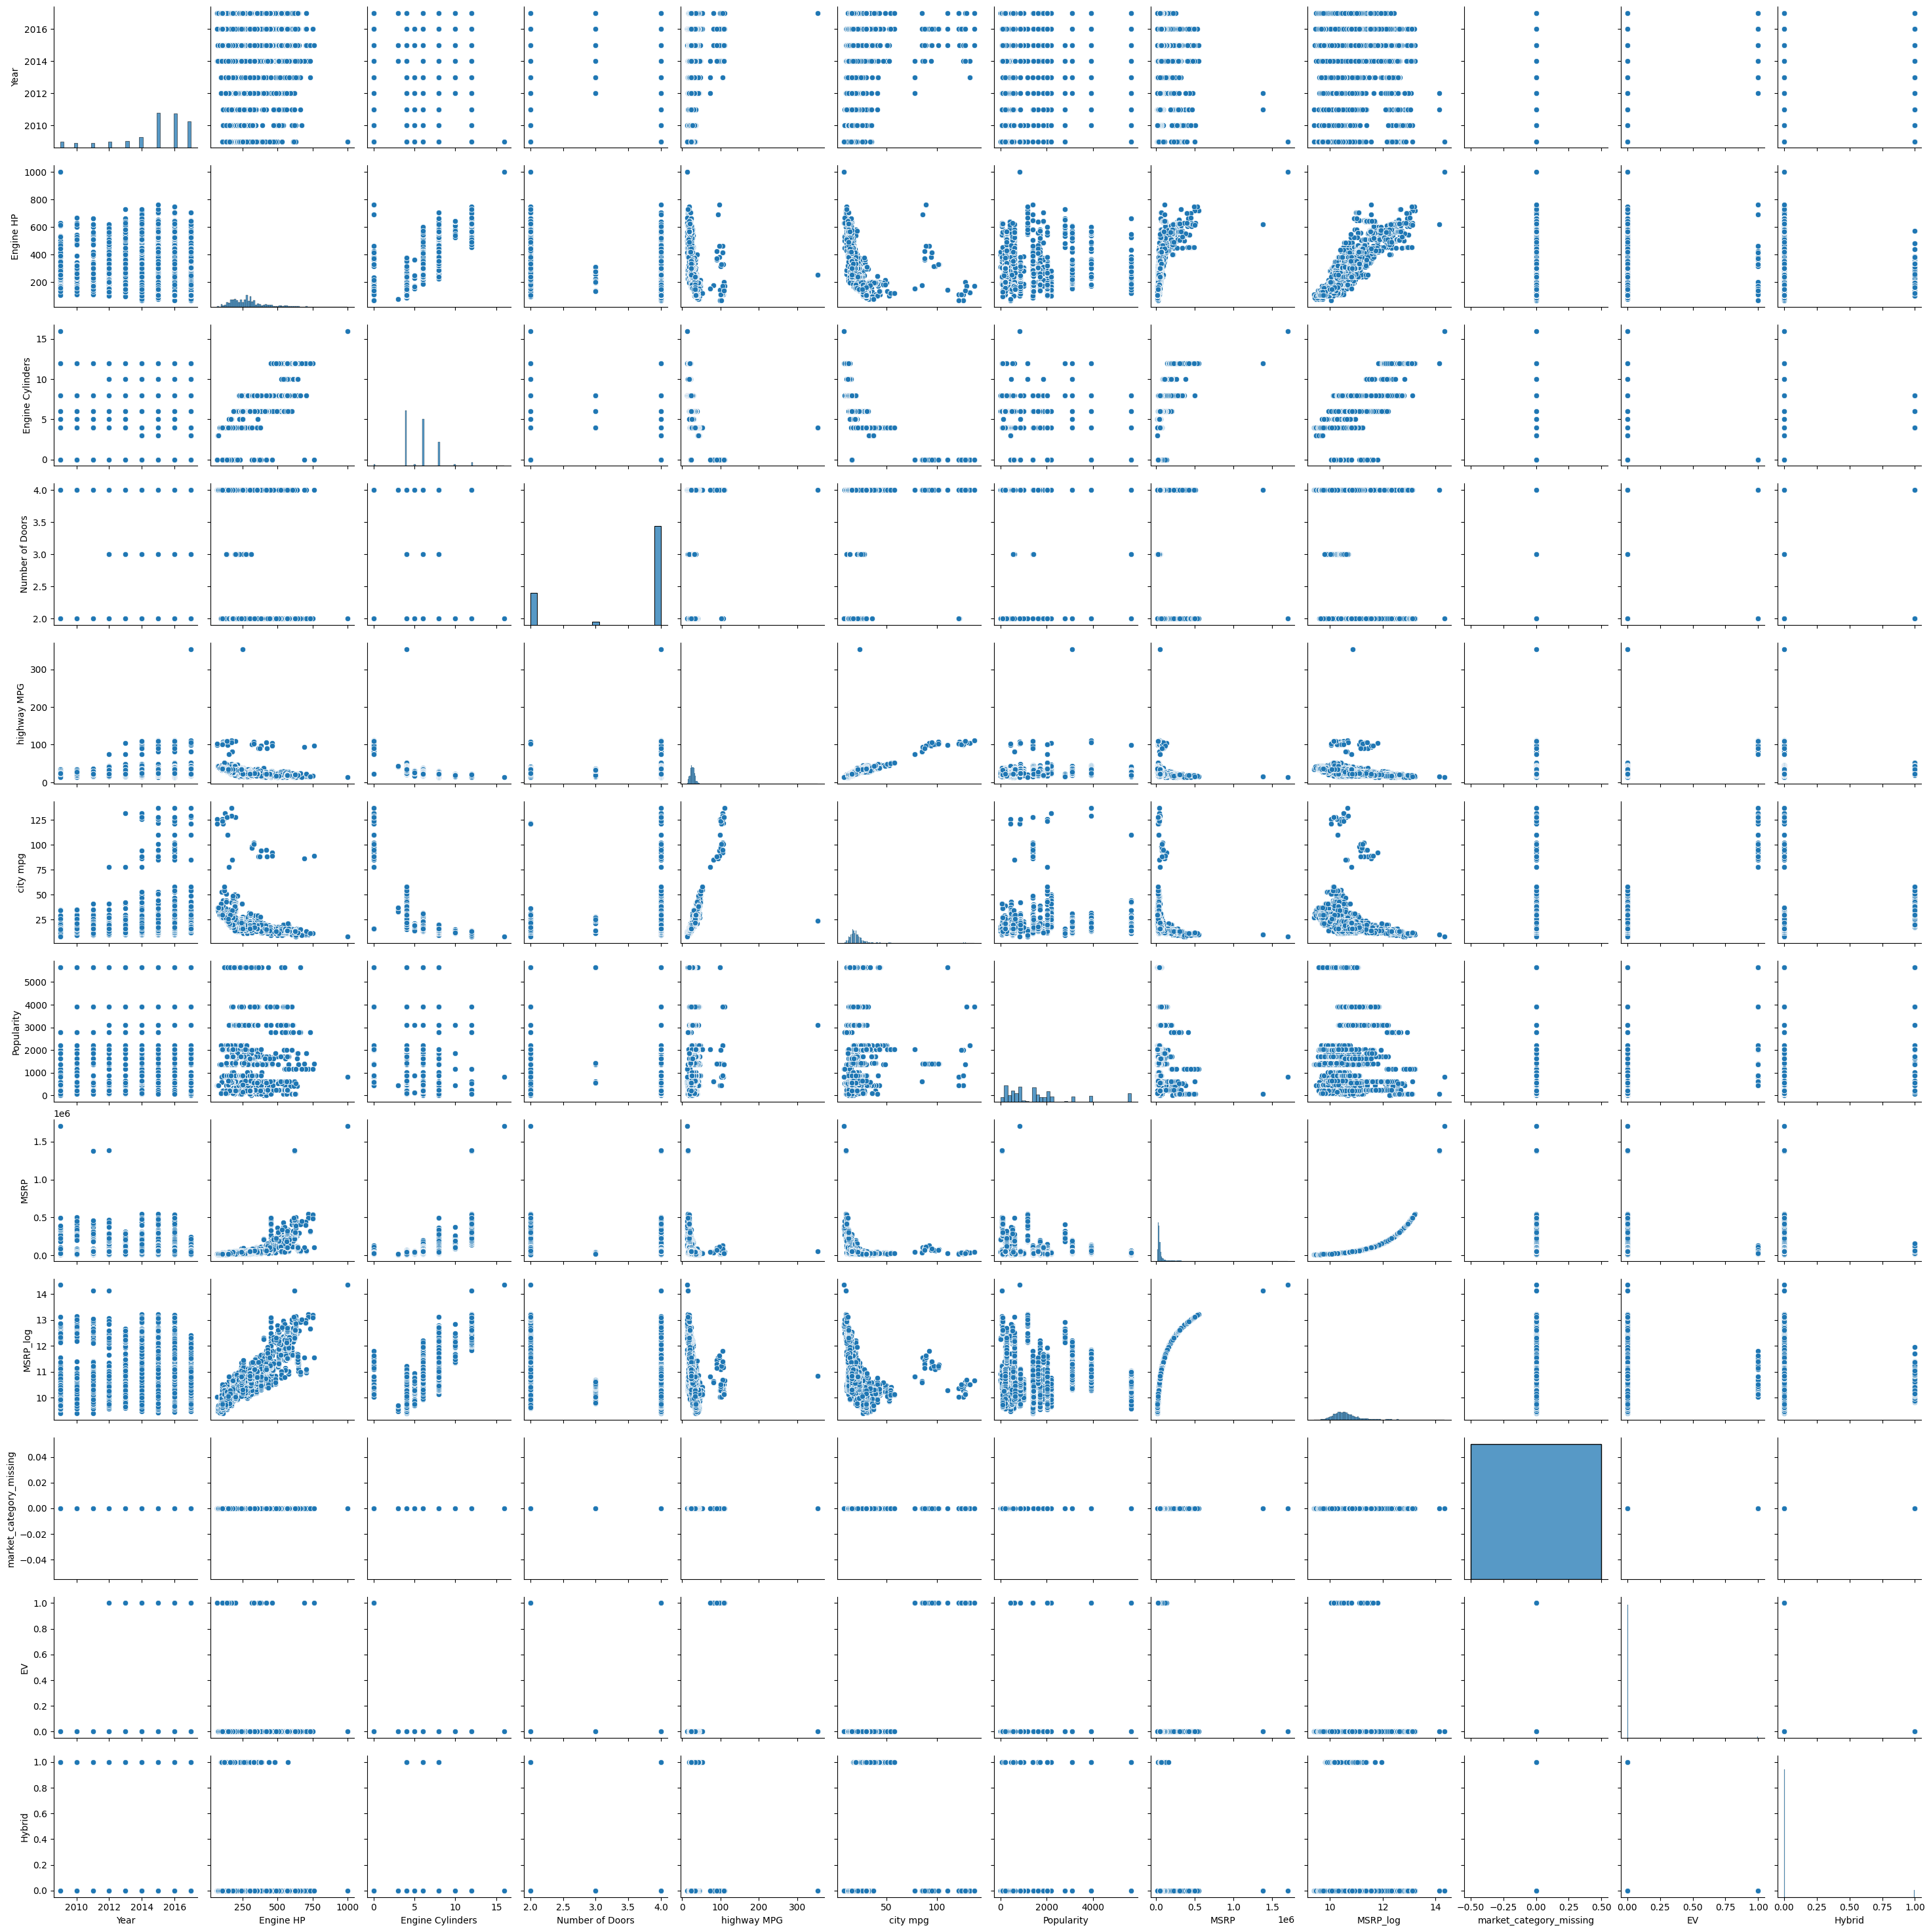

In [ ]:
sns.pairplot(df_2009)


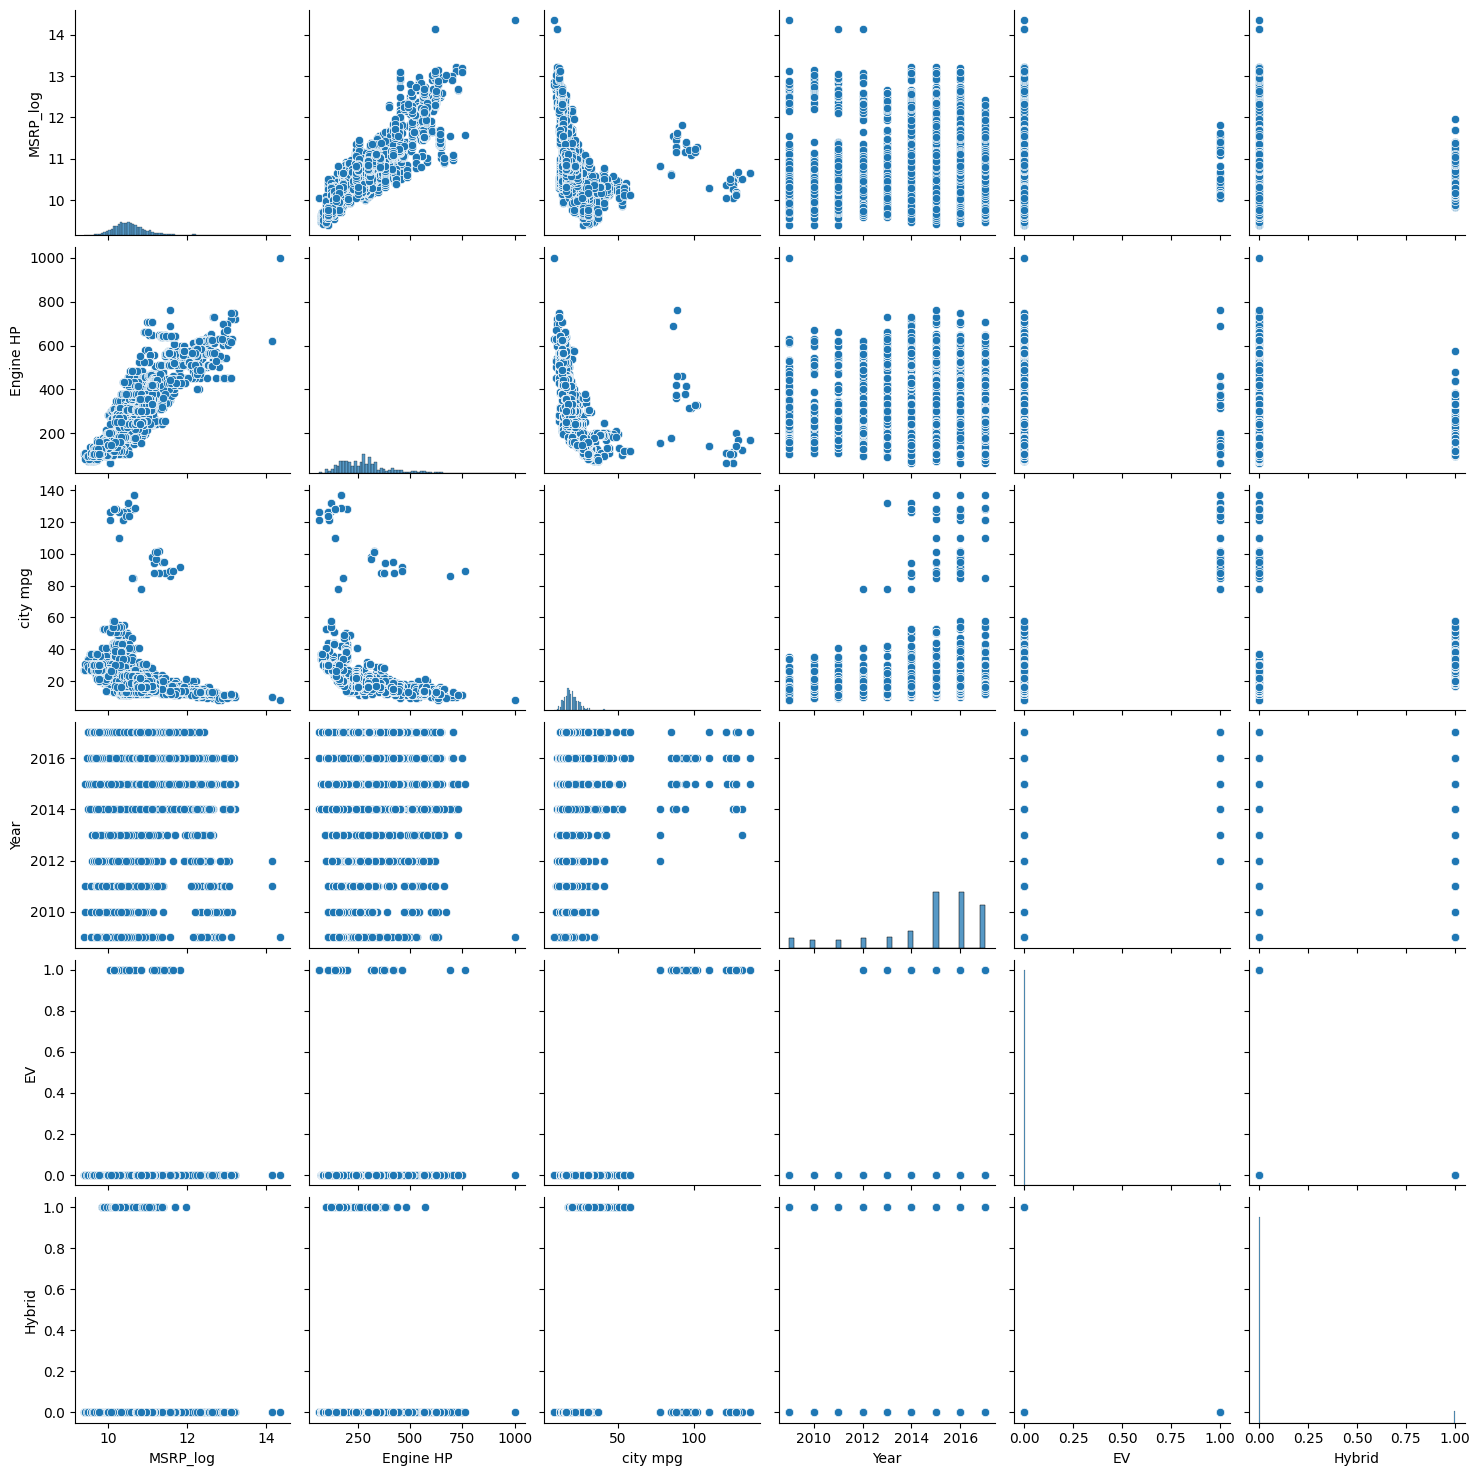

In [ ]:
sns.pairplot(df_2009[['MSRP_log', 'Engine HP', 'city mpg', 'Year',  'EV', 'Hybrid']])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68],
 [Text(0, 0, 'Factory Tuner,Luxury,High-Performance'),
  Text(1, 0, 'Luxury,Performance'),
  Text(2, 0, 'Luxury,High-Performance'),
  Text(3, 0, 'Luxury'),
  Text(4, 0, 'Performance'),
  Text(5, 0, 'Flex Fuel'),
  Text(6, 0, 'Flex Fuel,Performance'),
  Text(7, 0, 'Hatchback'),
  Text(8, 0, 'Hatchback,Luxury,Performance'),
  Text(9, 0, 'Hatchback,Luxury'),
  Text(10, 0, 'Luxury,High-Performance,Hybrid'),
  Text(11, 0, 'Diesel,Luxury'),
  Text(12, 0, 'High-Performance'),
  Text(13, 0, 'Factory Tuner,High-Performance'),
  Text(14, 0, 'Hatchback,Performance'),
  Text(15, 0, 'Exotic,High-Perfo

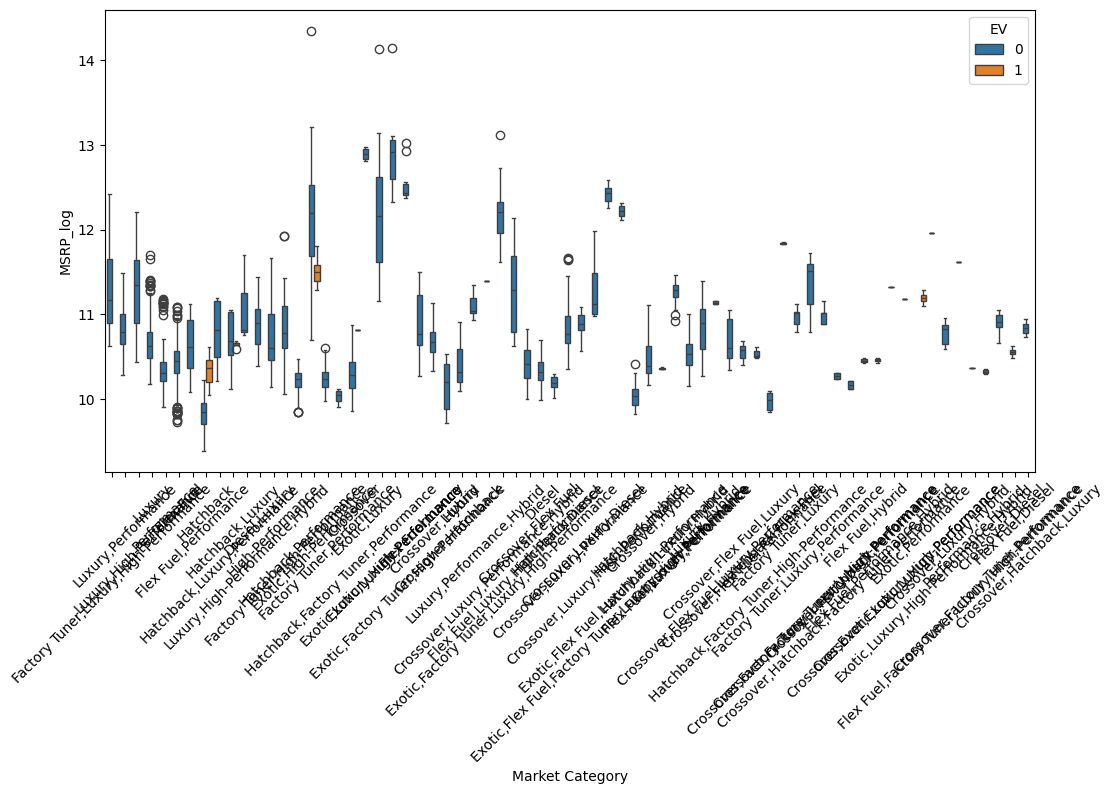

In [ ]:
# Vẽ biểu đồ giá theo phân khúc và tô màu theo loại xe (EV/Hybrid)
plt.figure(figsize=(12,6))
sns.boxplot(x='Market Category', y='MSRP_log', hue='EV', data=df_2009)
plt.xticks(rotation=45)

In [ ]:
import statsmodels.api as sm

baseline_brand = "Chevrolet"

# --- Brand dummies ---
make_dummies = pd.get_dummies(
    df_2009["Make"],
    prefix="brand",
    drop_first=False
)

make_dummies = make_dummies.drop(columns=[f"brand_{baseline_brand}"])
make_dummies = make_dummies.astype(int)
make_dummies = make_dummies.loc[df_2009.index]   # ⚠️ RẤT QUAN TRỌNG

# --- X matrix ---
X = df_2009[['Year', 'Engine HP', 'city mpg', 'EV', 'Hybrid']]
X = pd.concat([X, make_dummies], axis=1)
X = sm.add_constant(X)

y = df_2009['MSRP_log']

# --- Drop NA ---
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns="MSRP_log")
y = data["MSRP_log"]

# --- Model ---
model3 = sm.OLS(y, X).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:               MSRP_log   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1493.
Date:                Thu, 25 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:45:30   Log-Likelihood:                 2355.4
No. Observations:                6569   AIC:                            -4609.
Df Residuals:                    6518   BIC:                            -4263.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -8.8974    

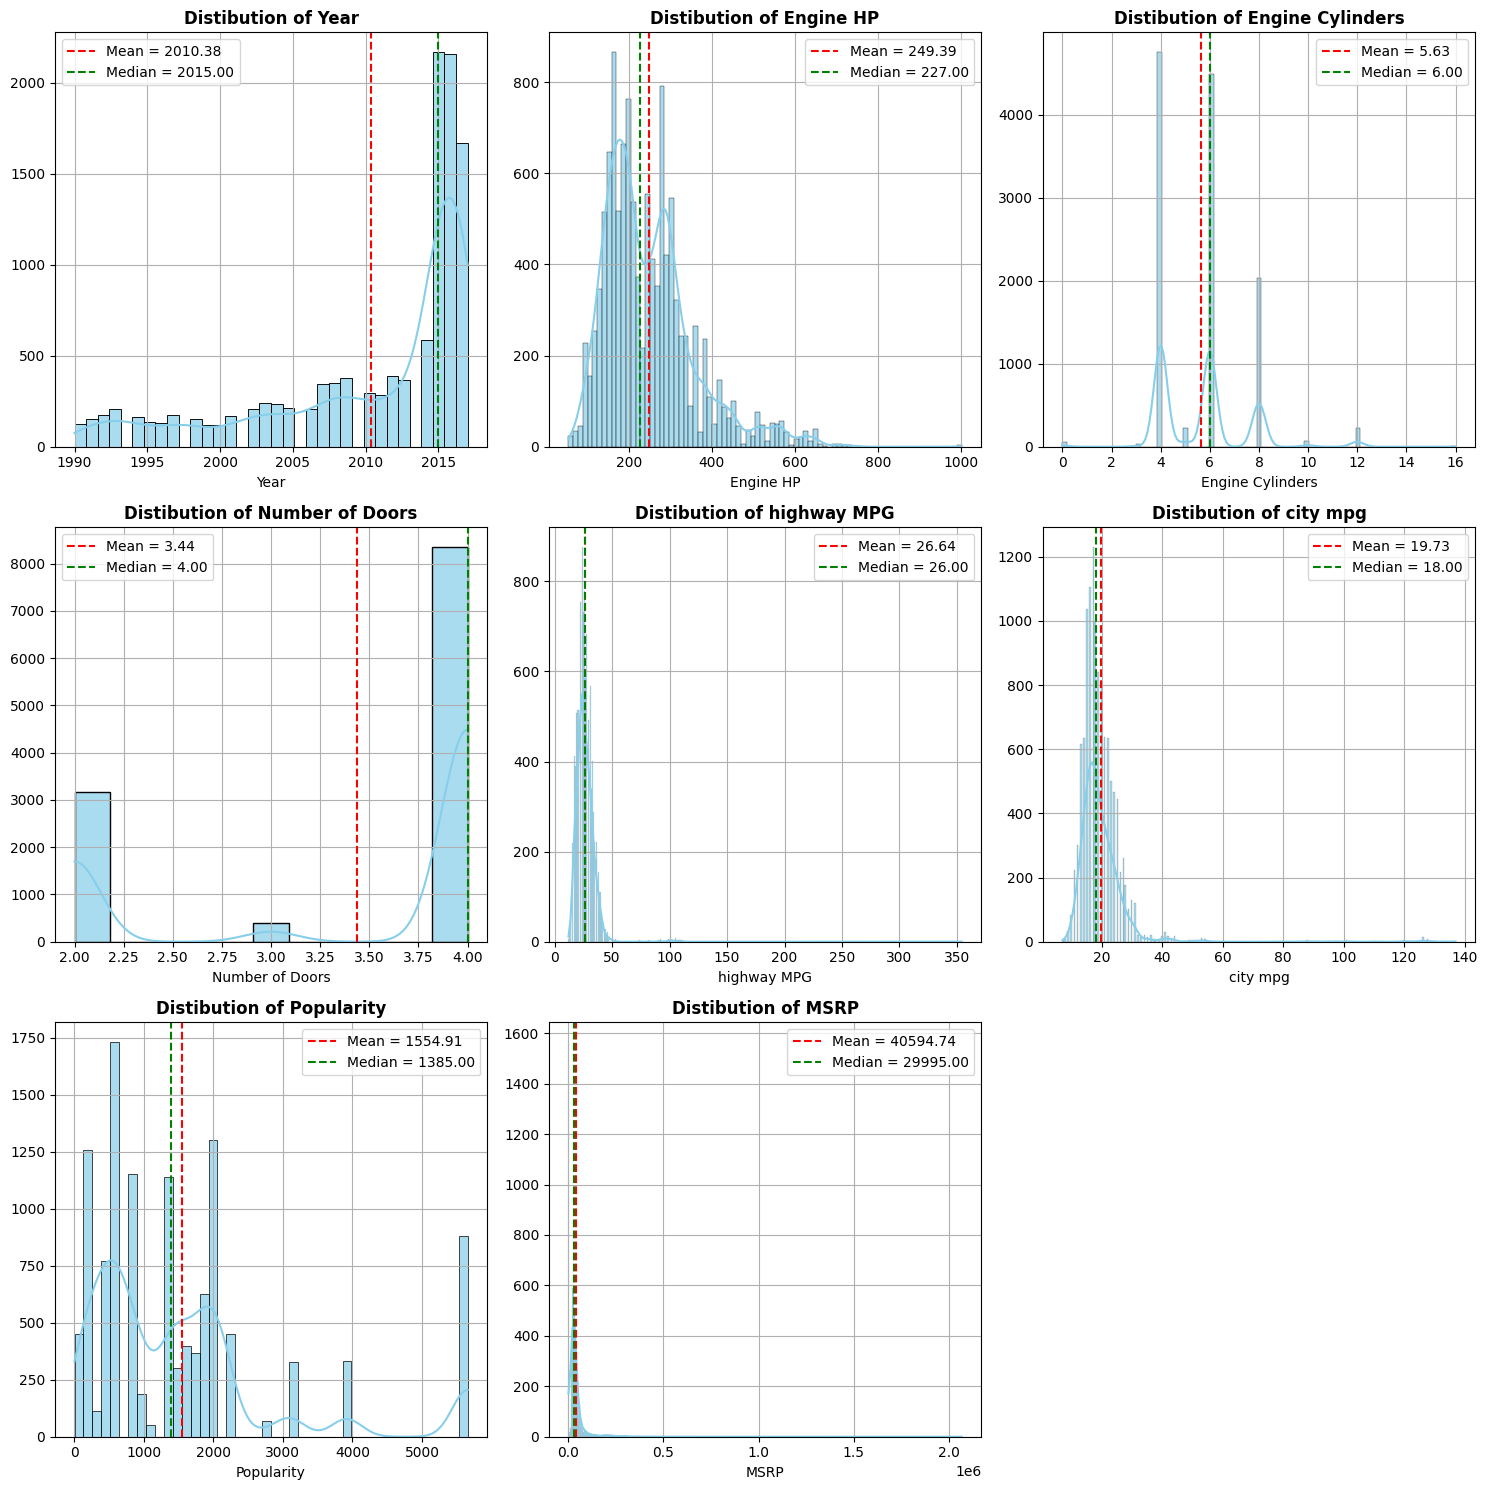

In [ ]:
quant_vars = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']  
plt.figure(figsize=(15,15))
for i, var in enumerate(quant_vars, 1):
    x = df[var].dropna()
    iqr = x.quantile(0.75) - x.quantile(0.25)
    bin_width = 2 * iqr / (len(x) ** (1/3))
    bins = int((x.max() - x.min()) / bin_width)

    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=bins, color='skyblue', alpha=0.7, edgecolor='black')
    plt.axvline(df[var].mean(), color='red', linestyle='--', label=f'Mean = {df[var].mean():.2f}')
    plt.axvline(df[var].median(), color='green', linestyle='--', label=f'Median = {df[var].median():.2f}')
    plt.title(f'Distibution of {var}', fontsize=12, fontweight='bold')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('')
    plt.grid()

plt.tight_layout()
    #plt.savefig('quantitative_variable_distributions.png', dpi=400, bbox_inches='tight') 
plt.show()




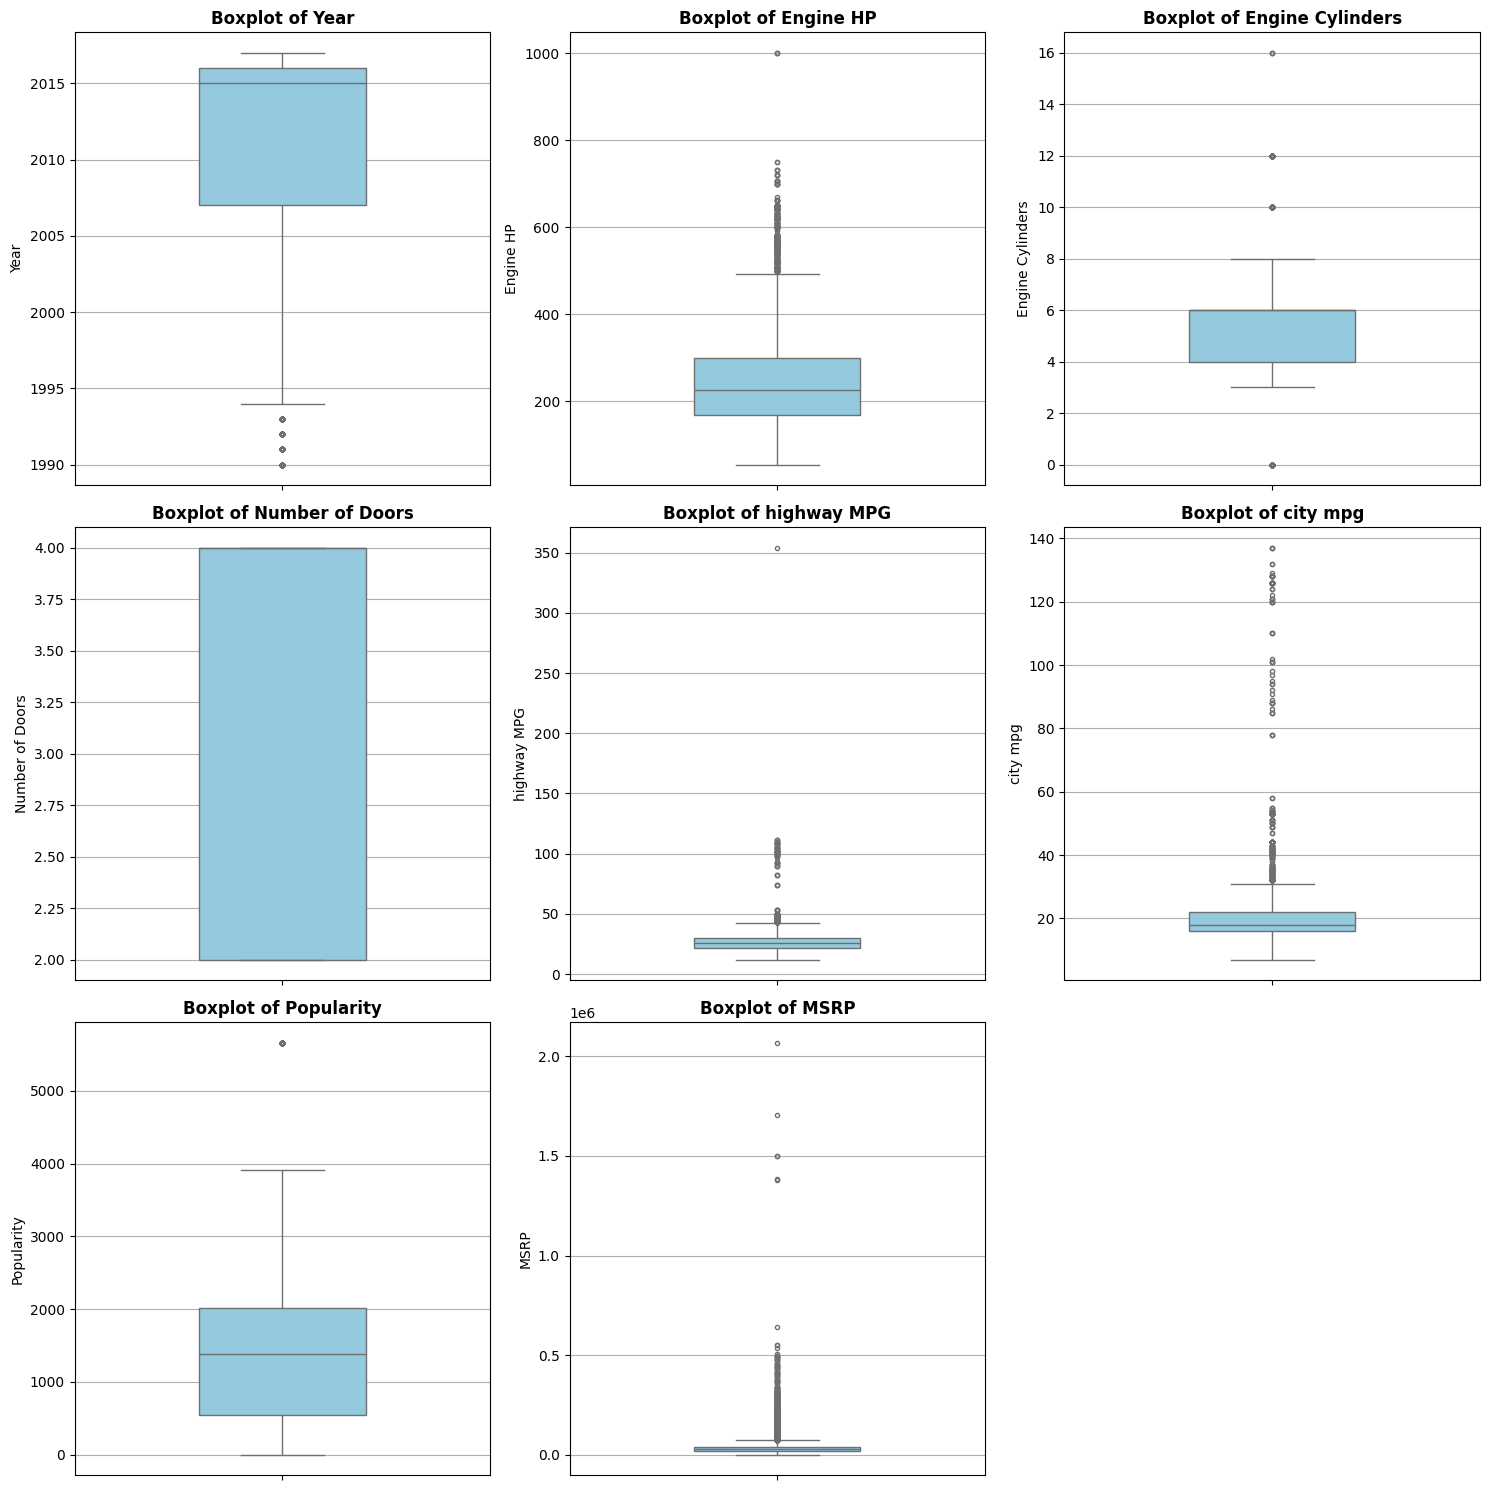

In [ ]:
plt.figure(figsize=(15, 15))

for i, var in enumerate(quant_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(
        y=df[var],
        color='skyblue',
        width=0.4,
        fliersize=3   # kích thước điểm outlier
    )
    plt.title(f'Boxplot of {var}', fontsize=12, fontweight='bold')
    plt.ylabel(var)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
NHẬN XÉT TỪNG BIẾN:
1. Engine HP: Phân phối lệch phải với một số giá trị ngoại lai cao. Hmm các giá trị ngoại lại này có thể là những mẫu xe hiệu suất cao. (không phải giá trị bất thường)
2. Engine Cylinders: Phân phối không đối xứng với nhiều giá trị tập trung ở các mức cụ thể (4, 6, 8 xi-lanh). Có một số giá trị ngoại lai cao hơn.
3. Number of Doors: Phân phối rời rạc với các giá trị phổ biến  
4. highway MPG và city mpg: Cả hai biến đều có phân phối lệch phải với một số giá trị ngoại lai cao. Điều này có thể phản ánh các mẫu xe tiết kiệm nhiên liệu cao cấp.
5. Popularity: Phân phối không đối xứng với nhiều giá trị tập trung ở mức thấp hơn. Có một số giá trị ngoại lai cao hơn.
6. MSRP: Phân phối lệch phải với một số giá trị ngoại lai rất cao. Những giá trị này có thể đại diện cho các mẫu xe sang trọng hoặc hiệu suất cao.